# **Airline Frequent Flyer Segmentation and Prediction**

This study uses the Airline Loyalty Campaign dataset to:

1. **Classify** customers based on cancellations
and
2. **Cluster** them into behavioural patterns. It also analyzes cancellation patterns to guide targeted retention strategies.

In [ ]:
# Import the datasets
import pandas as pd

history = pd.read_csv("Customer Loyalty History.csv")
activity = pd.read_csv("Customer Flight Activity.csv")

In [ ]:
# Analyze the dataset
history.info()
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

**Merge** 'Customer Flight Activity' and 'Customer Loyalty History' datasets on the common key- 'Loyalty Number'

In [ ]:
merged = pd.merge(activity, history, on="Loyalty Number", how="inner")

In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

In [ ]:
merged.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,...,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,...,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [ ]:
merged.describe()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,302952.000000,405624.000000,405624.000000,405624.000000,50064.000000,50064.000000
mean,550037.873084,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503,79268.825953,7991.976226,2015.252529,6.668008,2016.499521,6.966443
std,258935.286969,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038,34992.133508,6863.663857,1.979427,3.399766,1.384336,3.448300
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326961.000000,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59262.000000,3985.320000,2014.000000,4.000000,2016.000000,4.000000
50%,550834.000000,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000,73479.000000,5776.340000,2015.000000,7.000000,2017.000000,7.000000
75%,772194.000000,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000,88612.000000,8936.820000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


Drop Duplicates

In [ ]:
print("Merged duplicates:", merged.duplicated().sum())
merged = merged.drop_duplicates()

Merged duplicates: 1864


In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 non-null  object 
 13  Post

In [ ]:
# Checking for null values
merged.isnull().sum()

,0
Loyalty Number,0
Year,0
Month,0
Flights Booked,0
Flights with Companions,0
Total Flights,0
Distance,0
Points Accumulated,0
Points Redeemed,0
Dollar Cost Points Redeemed,0


Handling Missing Values

In [ ]:
merged['Cancellation Year'] = merged['Cancellation Year'].fillna(0)
merged['Cancellation Month'] = merged['Cancellation Month'].fillna(0)

Median Imputation for Salary

In [ ]:
median_salary = merged['Salary'].median()
merged['Salary'] = merged['Salary'].fillna(median_salary)

In [ ]:
print("Median salary used for imputation:", median_salary)

Median salary used for imputation: 73479.0


In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 non-null  object 
 13  Post

Data Aggregation by Loyalty Number:

In [ ]:
sum_cols = ['Flights Booked', 'Flights with Companions', 'Total Flights',
            'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']

# Keep Columns
static_cols = [col for col in merged.columns if col not in sum_cols + ['Year', 'Month', 'Loyalty Number']]

# Aggregate by Loyalty Number
agg_df = merged.groupby('Loyalty Number').agg(
    {**{col: 'sum' for col in sum_cols},  # sum behaviour metrics
     **{col: 'first' for col in static_cols}}  # keep first value of static columns
).reset_index()

# View result
print(agg_df.head())

   Loyalty Number  Flights Booked  Flights with Companions  Total Flights  \
0          100018             157                       35            192   
1          100102             173                       42            215   
2          100140             152                       38            190   
3          100214              79                       17             96   
4          100272             127                       36            163   

   Distance  Points Accumulated  Points Redeemed  Dollar Cost Points Redeemed  \
0     50682             5376.00             1513                          123   
1     40222             4115.25             1195                           96   
2     41252             4184.25              593                           48   
3     33982             3426.00              861                           70   
4     40872             4108.04             1007                           82   

  Country          Province  ... Education   Salar

In [ ]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Loyalty Number               16737 non-null  int64  
 1   Flights Booked               16737 non-null  int64  
 2   Flights with Companions      16737 non-null  int64  
 3   Total Flights                16737 non-null  int64  
 4   Distance                     16737 non-null  int64  
 5   Points Accumulated           16737 non-null  float64
 6   Points Redeemed              16737 non-null  int64  
 7   Dollar Cost Points Redeemed  16737 non-null  int64  
 8   Country                      16737 non-null  object 
 9   Province                     16737 non-null  object 
 10  City                         16737 non-null  object 
 11  Postal Code                  16737 non-null  object 
 12  Gender                       16737 non-null  object 
 13  Education       

In [ ]:
# Target column based on Cancellation Year
agg_df['cancel'] = agg_df['Cancellation Year'].apply(lambda x: 1 if x > 0 else 0)

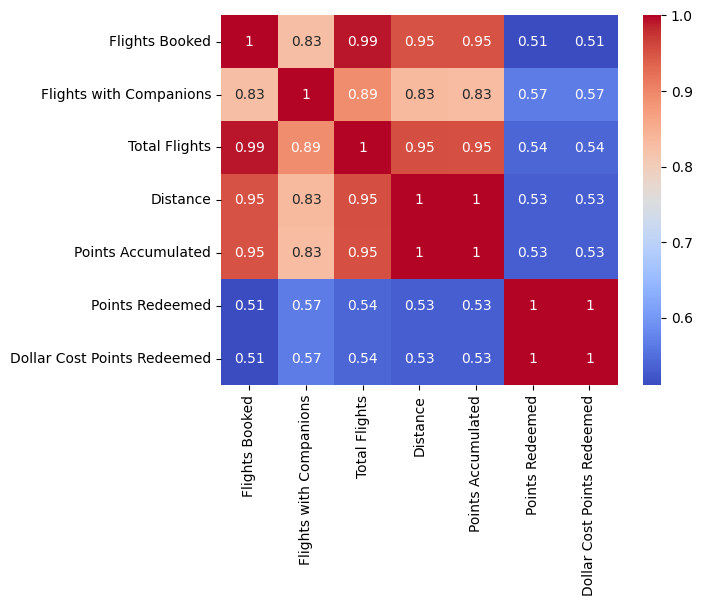

In [ ]:
# Heatmap for numerical columns
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(agg_df[sum_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

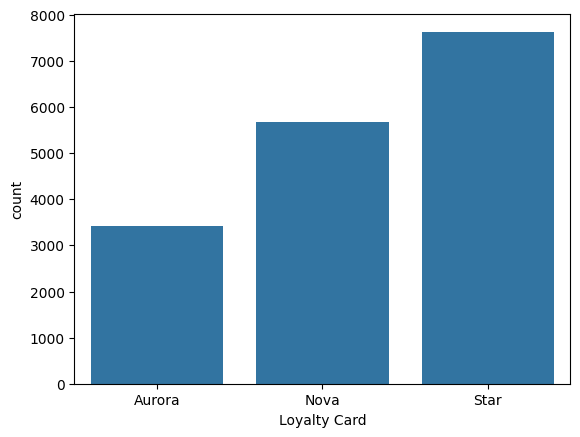

In [ ]:
# Distribution of Loyalty Card Types
import numpy as np
sns.countplot(x='Loyalty Card', data=agg_df)
plt.show()

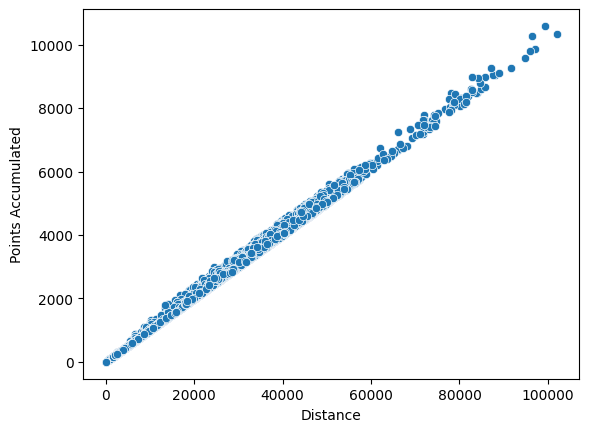

In [ ]:
# Linear Relationship between Points Accumulated and Distance
sns.scatterplot(x='Distance', y='Points Accumulated', data=agg_df)
plt.show()

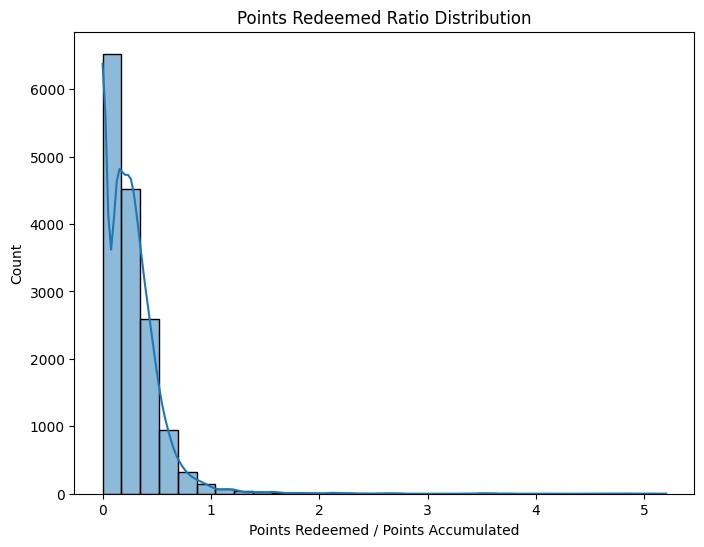

In [ ]:
# Points Redeemed Ratio Distribution
plt.figure(figsize=(8,6))
sns.histplot(agg_df['Points Redeemed'] / agg_df['Points Accumulated'], bins=30, kde=True)
plt.title('Points Redeemed Ratio Distribution')
plt.xlabel('Points Redeemed / Points Accumulated')
plt.show()

In [ ]:
# List of categorical columns
cat_cols = ['Country','Province','City','Gender','Education','Marital Status','Loyalty Card','Enrollment Type']

# Print unique values for each column
for col in cat_cols:
    print(f"{col}:")
    print(agg_df[col].unique())
    print("Number of unique values: ", agg_df[col].nunique())
    print()

Country:
['Canada']
Number of unique values:  1

Province:
['Alberta' 'Ontario' 'British Columbia' 'Saskatchewan' 'Quebec' 'Manitoba'
 'Newfoundland' 'New Brunswick' 'Nova Scotia' 'Prince Edward Island'
 'Yukon']
Number of unique values:  11

City:
['Edmonton' 'Toronto' 'Dawson Creek' 'Vancouver' 'Regina' 'Montreal'
 'Sudbury' 'Winnipeg' 'Quebec City' 'Peace River' "St. John's" 'Tremblant'
 'Ottawa' 'Trenton' 'Thunder Bay' 'West Vancouver' 'Fredericton' 'London'
 'Halifax' 'Moncton' 'Banff' 'Kingston' 'Whistler' 'Charlottetown' 'Hull'
 'Victoria' 'Calgary' 'Kelowna' 'Whitehorse']
Number of unique values:  29

Gender:
['Female' 'Male']
Number of unique values:  2

Education:
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Number of unique values:  5

Marital Status:
['Married' 'Single' 'Divorced']
Number of unique values:  3

Loyalty Card:
['Aurora' 'Nova' 'Star']
Number of unique values:  3

Enrollment Type:
['Standard' '2018 Promotion']
Number of unique values:  2



Label Encoding:

In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
cat_cols = ['Province','City','Gender','Education','Marital Status','Loyalty Card','Enrollment Type']


le = LabelEncoder()
for col in cat_cols:
    agg_df[col] = le.fit_transform(agg_df[col])
    print(col, agg_df[col].unique())

agg_df.head()

Province [ 0  6  1  9  8  2  4  3  5  7 10]
City [ 4 20  3 23 16 12 18 28 15 14 17 21 13 22 19 25  5 10  6 11  0  9 26  2
  7 24  1  8 27]
Gender [0 1]
Education [0 1 4 3 2]
Marital Status [1 2 0]
Loyalty Card [0 1 2]
Enrollment Type [1 0]


,Loyalty Number,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,...,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,cancel
0,100018,157,35,192,50682,5376.00,1513,123,Canada,0,...,92552.0,1,0,7919.20,1,2016,8,0.0,0.0,0
1,100102,173,42,215,40222,4115.25,1195,96,Canada,6,...,73479.0,2,1,2887.74,1,2013,3,0.0,0.0,0
2,100140,152,38,190,41252,4184.25,593,48,Canada,1,...,73479.0,0,1,2838.07,1,2016,7,0.0,0.0,0
3,100214,79,17,96,33982,3426.00,861,70,Canada,1,...,63253.0,1,2,4170.57,1,2015,8,0.0,0.0,0
4,100272,127,36,163,40872,4108.04,1007,82,Canada,6,...,91163.0,0,2,6622.05,1,2014,1,0.0,0.0,0


In [ ]:
agg_df = agg_df.drop('Country', axis=1) # Drop Country (single value- Canada)

In [ ]:
agg_df = agg_df.drop('Postal Code', axis=1) # Drop Postal Code (all unique values)

In [ ]:
agg_df = agg_df.drop(['Enrollment Month', 'Cancellation Month'], axis=1) # Drop Enrollment Month and Cancellation Month (Year sufficient)

In [ ]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Loyalty Number               16737 non-null  int64  
 1   Flights Booked               16737 non-null  int64  
 2   Flights with Companions      16737 non-null  int64  
 3   Total Flights                16737 non-null  int64  
 4   Distance                     16737 non-null  int64  
 5   Points Accumulated           16737 non-null  float64
 6   Points Redeemed              16737 non-null  int64  
 7   Dollar Cost Points Redeemed  16737 non-null  int64  
 8   Province                     16737 non-null  int64  
 9   City                         16737 non-null  int64  
 10  Gender                       16737 non-null  int64  
 11  Education                    16737 non-null  int64  
 12  Salary                       16737 non-null  float64
 13  Marital Status  

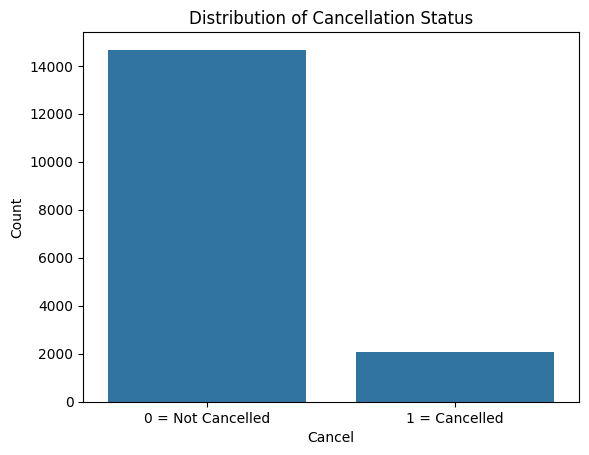

In [ ]:
# Distribution of Cancellation Status
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='cancel', data=agg_df)
plt.title('Distribution of Cancellation Status')
plt.xlabel('Cancel')
plt.ylabel('Count')

plt.xticks([0, 1], ['0 = Not Cancelled', '1 = Cancelled'])

plt.show()

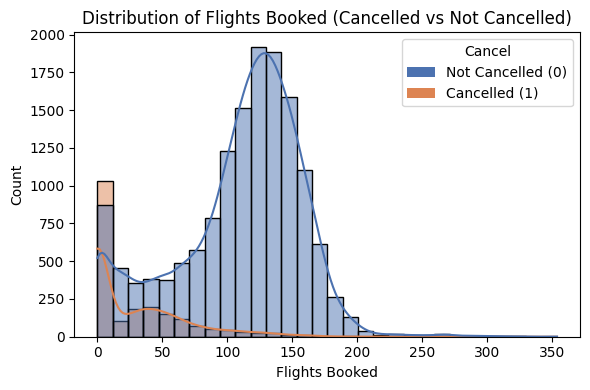

In [ ]:
# Distribution of Flights Booked (Cancelled vs Not Cancelled)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))

# Plot histogram + KDE
sns.histplot(
    data=agg_df,
    x='Flights Booked',
    hue='cancel',
    hue_order=[0, 1],                # 0 = Not Cancelled, 1 = Cancelled
    palette=['#4c72b0', '#dd8452'],
    kde=True,
    bins=30
)

plt.title('Distribution of Flights Booked (Cancelled vs Not Cancelled)')
plt.xlabel('Flights Booked')
plt.ylabel('Count')
from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor='#4c72b0', label='Not Cancelled (0)'),
    Patch(facecolor='#dd8452', label='Cancelled (1)')
]
plt.legend(handles=legend_elements, title='Cancel')

plt.tight_layout()
plt.show()

## Classification

In [ ]:
agg_df.columns

Index(['Loyalty Number', 'Flights Booked', 'Flights with Companions',
       'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed', 'Province', 'City', 'Gender',
       'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV',
       'Enrollment Type', 'Enrollment Year', 'Cancellation Year', 'cancel'],
      dtype='object')

In [ ]:
agg_df.corr()

,Loyalty Number,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Province,City,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Cancellation Year,cancel
Loyalty Number,1.000000,-0.004307,-0.008943,-0.005517,-0.002903,-0.002926,0.003286,0.003260,-0.007670,-0.004905,0.006224,0.010129,0.012455,-0.007845,0.005387,-0.000645,0.014819,0.008902,0.001581,0.001579
Flights Booked,-0.004307,1.000000,0.826153,0.991451,0.952177,0.950858,0.510776,0.511010,-0.007588,-0.000716,0.012589,0.013654,0.011899,0.008796,-0.007743,-0.006088,0.103891,-0.358442,-0.484048,-0.484172
Flights with Companions,-0.008943,0.826153,1.000000,0.892608,0.833067,0.831274,0.565077,0.565286,-0.006606,0.008309,0.010438,0.010543,0.006857,0.008904,-0.004340,-0.007559,0.096218,-0.311187,-0.420099,-0.420206
Total Flights,-0.005517,0.991451,0.892608,1.000000,0.954788,0.953317,0.539547,0.539783,-0.007601,0.001351,0.012490,0.013367,0.011108,0.009100,-0.007200,-0.006621,0.105409,-0.358865,-0.484588,-0.484712
Distance,-0.002903,0.952177,0.833067,0.954788,1.000000,0.998816,0.530597,0.530851,-0.007498,0.004071,0.008253,0.014596,0.015867,0.005860,-0.004562,-0.008536,0.110386,-0.364704,-0.494076,-0.494199
Points Accumulated,-0.002926,0.950858,0.831274,0.953317,0.998816,1.000000,0.529938,0.530196,-0.007113,0.003993,0.007635,0.013040,0.015602,0.004917,-0.036369,-0.001531,0.110220,-0.362691,-0.493114,-0.493238
Points Redeemed,0.003286,0.510776,0.565077,0.539547,0.530597,0.529938,1.000000,0.999979,0.001332,0.000869,-0.000729,0.008939,0.009955,-0.001819,-0.003624,-0.000821,0.069703,-0.202822,-0.274273,-0.274340
Dollar Cost Points Redeemed,0.003260,0.511010,0.565286,0.539783,0.530851,0.530196,0.999979,1.000000,0.001253,0.000905,-0.000752,0.008994,0.009932,-0.001859,-0.003641,-0.000708,0.069759,-0.202990,-0.274416,-0.274484
Province,-0.007670,-0.007588,-0.006606,-0.007601,-0.007498,-0.007113,0.001332,0.001253,1.000000,-0.155334,0.009402,-0.002321,0.002179,0.002542,0.007893,0.004214,-0.014568,0.001169,0.003587,0.003580
City,-0.004905,-0.000716,0.008309,0.001351,0.004071,0.003993,0.000869,0.000905,-0.155334,1.000000,0.003707,-0.006316,-0.002687,0.003286,0.005833,-0.003669,-0.002002,0.000068,0.003603,0.003595


In [ ]:
import pandas as pd
import numpy as np

df_fe = agg_df.copy()

# Flight-related ratios
df_fe['Companion_Ratio'] = df_fe['Flights with Companions'] / (df_fe['Total Flights'] + 1e-5)
df_fe['Redeemed_Points_Ratio'] = df_fe['Points Redeemed'] / (df_fe['Points Accumulated'] + 1e-5)
df_fe['Points_per_Flight'] = df_fe['Points Accumulated'] / (df_fe['Total Flights'] + 1e-5)

# Cost efficiency
df_fe['Dollar_per_Point_Redeemed'] = df_fe['Dollar Cost Points Redeemed'] / (df_fe['Points Redeemed'] + 1e-5)
df_fe['Salary_per_Flight'] = df_fe['Salary'] / (df_fe['Total Flights'] + 1e-5)

# Loyalty / tenure
df_fe['Loyalty_Duration'] = df_fe['Cancellation Year'] - df_fe['Enrollment Year']
df_fe['Flights_per_Year'] = df_fe['Total Flights'] / (df_fe['Loyalty_Duration'] + 1e-5)
df_fe['Points_per_Year'] = df_fe['Points Accumulated'] / (df_fe['Loyalty_Duration'] + 1e-5)

# Engagement
df_fe['Flights_with_Companion_Ratio'] = df_fe['Flights with Companions'] / (df_fe['Total Flights'] + 1e-5)

# CLV interactions
df_fe['CLV_per_Flight'] = df_fe['CLV'] / (df_fe['Total Flights'] + 1e-5)
df_fe['CLV_per_Point'] = df_fe['CLV'] / (df_fe['Points Accumulated'] + 1e-5)

# Encode categorical features as frequency
cat_cols = ['Province','City','Gender','Education','Marital Status','Loyalty Card','Enrollment Type']
for col in cat_cols:
    freq = df_fe[col].value_counts(normalize=True)
    df_fe[col + '_freq'] = df_fe[col].map(freq)

# New columns
print("New Feature-Engineered Columns:", [c for c in df_fe.columns if c not in agg_df.columns])


New Feature-Engineered Columns: ['Companion_Ratio', 'Redeemed_Points_Ratio', 'Points_per_Flight', 'Dollar_per_Point_Redeemed', 'Salary_per_Flight', 'Loyalty_Duration', 'Flights_per_Year', 'Points_per_Year', 'Flights_with_Companion_Ratio', 'CLV_per_Flight', 'CLV_per_Point', 'Province_freq', 'City_freq', 'Gender_freq', 'Education_freq', 'Marital Status_freq', 'Loyalty Card_freq', 'Enrollment Type_freq']


In [ ]:
df_fe.corr()

,Loyalty Number,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Province,City,...,Flights_with_Companion_Ratio,CLV_per_Flight,CLV_per_Point,Province_freq,City_freq,Gender_freq,Education_freq,Marital Status_freq,Loyalty Card_freq,Enrollment Type_freq
Loyalty Number,1.000000,-0.004307,-0.008943,-0.005517,-0.002903,-0.002926,0.003286,0.003260,-0.007670,-0.004905,...,-0.002608,0.007958,0.007958,-0.014935,-0.004861,-0.006224,-0.011437,-0.011502,0.005348,0.014819
Flights Booked,-0.004307,1.000000,0.826153,0.991451,0.952177,0.950858,0.510776,0.511010,-0.007588,-0.000716,...,0.344519,-0.417648,-0.417648,-0.001740,0.004597,-0.012589,-0.015025,0.000892,-0.007876,0.103891
Flights with Companions,-0.008943,0.826153,1.000000,0.892608,0.833067,0.831274,0.565077,0.565286,-0.006606,0.008309,...,0.630858,-0.361835,-0.361835,-0.000343,0.005359,-0.010438,-0.011635,0.000764,-0.004541,0.096218
Total Flights,-0.005517,0.991451,0.892608,1.000000,0.954788,0.953317,0.539547,0.539783,-0.007601,0.001351,...,0.421752,-0.417967,-0.417966,-0.001472,0.004919,-0.012490,-0.014717,0.000891,-0.007353,0.105409
Distance,-0.002903,0.952177,0.833067,0.954788,1.000000,0.998816,0.530597,0.530851,-0.007498,0.004071,...,0.400521,-0.422653,-0.422653,-0.000178,0.006388,-0.008253,-0.014519,0.003218,-0.004837,0.110386
Points Accumulated,-0.002926,0.950858,0.831274,0.953317,0.998816,1.000000,0.529938,0.530196,-0.007113,0.003993,...,0.399112,-0.422013,-0.422012,-0.000112,0.006709,-0.007635,-0.012836,0.004277,-0.036775,0.110220
Points Redeemed,0.003286,0.510776,0.565077,0.539547,0.530597,0.529938,1.000000,0.999979,0.001332,0.000869,...,0.349733,-0.235346,-0.235346,0.003860,0.004237,0.000729,-0.013058,-0.005290,-0.004066,0.069703
Dollar Cost Points Redeemed,0.003260,0.511010,0.565286,0.539783,0.530851,0.530196,0.999979,1.000000,0.001253,0.000905,...,0.349851,-0.235451,-0.235451,0.003823,0.004202,0.000752,-0.013096,-0.005325,-0.004083,0.069759
Province,-0.007670,-0.007588,-0.006606,-0.007601,-0.007498,-0.007113,0.001332,0.001253,1.000000,-0.155334,...,0.000837,0.000274,0.000274,0.101888,0.109574,-0.009402,0.001574,-0.006396,0.007706,-0.014568
City,-0.004905,-0.000716,0.008309,0.001351,0.004071,0.003993,0.000869,0.000905,-0.155334,1.000000,...,0.014138,-0.003919,-0.003919,0.380488,0.371138,-0.003707,0.000178,-0.001834,0.005320,-0.002002


In [ ]:
# Compute correlations with target 'cancel'
corr_matrix = df_fe.corr()

# Get correlations of all features with 'cancel'
corr_with_target = corr_matrix['cancel'].drop('cancel')  # remove self-correlation

# Take absolute value and sort descending
top_features = corr_with_target.abs().sort_values(ascending=False).head(30)

print("Top features correlated with 'cancel':")
print(top_features)


Top features correlated with 'cancel':
Cancellation Year               1.000000
Loyalty_Duration                0.999996
Distance                        0.494199
Points Accumulated              0.493238
Total Flights                   0.484712
Flights Booked                  0.484172
Salary_per_Flight               0.438237
Flights with Companions         0.420206
CLV_per_Flight                  0.353152
CLV_per_Point                   0.353152
Dollar_per_Point_Redeemed       0.337013
Flights_with_Companion_Ratio    0.314022
Companion_Ratio                 0.314022
Points_per_Year                 0.309493
Flights_per_Year                0.309120
Points_per_Flight               0.301452
Dollar Cost Points Redeemed     0.274484
Points Redeemed                 0.274340
Redeemed_Points_Ratio           0.112085
Loyalty Card                    0.015895
Loyalty Card_freq               0.015774
Marital Status                  0.008052
CLV                             0.007817
Marital Status_fre

In [ ]:
df_fe.columns

Index(['Loyalty Number', 'Flights Booked', 'Flights with Companions',
       'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed', 'Province', 'City', 'Gender',
       'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV',
       'Enrollment Type', 'Enrollment Year', 'Cancellation Year', 'cancel',
       'Companion_Ratio', 'Redeemed_Points_Ratio', 'Points_per_Flight',
       'Dollar_per_Point_Redeemed', 'Salary_per_Flight', 'Loyalty_Duration',
       'Flights_per_Year', 'Points_per_Year', 'Flights_with_Companion_Ratio',
       'CLV_per_Flight', 'CLV_per_Point', 'Province_freq', 'City_freq',
       'Gender_freq', 'Education_freq', 'Marital Status_freq',
       'Loyalty Card_freq', 'Enrollment Type_freq'],
      dtype='object')

In [ ]:
# Import necessary modules
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,f1_score,mean_squared_error, r2_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

PCA

In [ ]:
features = [
    'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance',
    'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
    'Province', 'City', 'Gender', 'Education', 'Salary', 'Marital Status',
    'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year',
    'Companion_Ratio', 'Redeemed_Points_Ratio', 'Points_per_Flight',
    'Dollar_per_Point_Redeemed', 'Salary_per_Flight', 'Flights_per_Year',
    'Points_per_Year', 'Flights_with_Companion_Ratio',
    'CLV_per_Flight', 'CLV_per_Point',
    'Province_freq', 'City_freq', 'Gender_freq', 'Education_freq',
    'Marital Status_freq', 'Loyalty Card_freq', 'Enrollment Type_freq'
]

X = df_fe[features]
y = df_fe['cancel']

# Train-test split before scaling & PCA
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled  = scaler.transform(X_test_raw)


# PCA
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

print("Original feature count:", X_train_raw.shape[1])
print("Reduced PCA components:", X_train_pca.shape[1])

Original feature count: 34
Reduced PCA components: 18


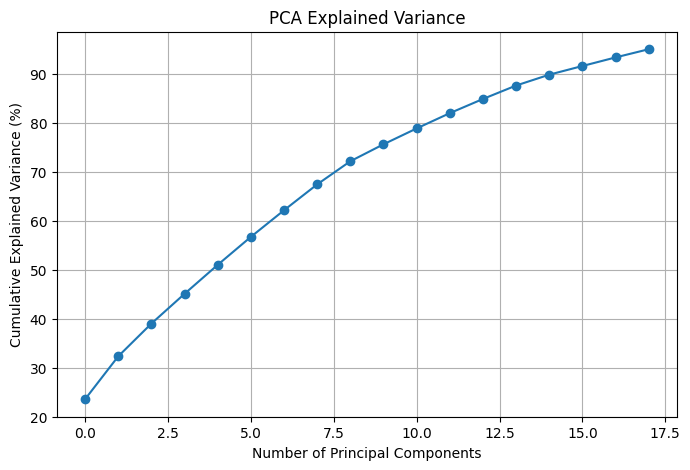

In [ ]:
# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()

Model Training

In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_pca, y_train)
rf_pred = rf.predict(X_test_pca)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Decision Tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train_pca, y_train)
dt_pred = dt.predict(X_test_pca)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

# Logistic Regression
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_pca, y_train)
lr_pred = lr.predict(X_test_pca)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_pca, y_train)
nb_pred = nb.predict(X_test_pca)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))

# XGBoost
xg = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight= len(y_train[y_train==0]) / len(y_train[y_train==1]),  # imbalance handling
    eval_metric="logloss",
    random_state=42
)
xg.fit(X_train_pca, y_train)
xg_pred = xg.predict(X_test_pca)
print("XGBoost Accuracy:", accuracy_score(y_test, xg_pred))

Random Forest Accuracy: 0.959378733572282
Decision Tree Accuracy: 0.9199522102747909
Logistic Regression Accuracy: 0.9387694145758662
Naive Bayes Accuracy: 0.8536439665471923
XGBoost Accuracy: 0.9543010752688172


In [ ]:
import pandas as pd

# PCA loadings
loadings = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

for i in range(pca.n_components_):
    print(f"\nTop features for PC{i+1}:")
    print(loadings.iloc[i].abs().sort_values(ascending=False).head(10))



Top features for PC1:
Total Flights                  0.314889
Distance                       0.313254
Points Accumulated             0.312850
Flights with Companions        0.305883
Flights Booked                 0.305056
Dollar_per_Point_Redeemed      0.259677
Dollar Cost Points Redeemed    0.248026
Points Redeemed                0.247949
Salary_per_Flight              0.247427
Companion_Ratio                0.235039
Name: PC1, dtype: float64

Top features for PC2:
Enrollment Type_freq            0.372582
Enrollment Type                 0.372582
Enrollment Year                 0.342267
Points_per_Year                 0.308469
Flights_per_Year                0.306958
CLV_per_Point                   0.258189
CLV_per_Flight                  0.258189
Salary_per_Flight               0.225661
Companion_Ratio                 0.208256
Flights_with_Companion_Ratio    0.208256
Name: PC2, dtype: float64

Top features for PC3:
Education_freq         0.461731
Loyalty Card           0.457033
Loyal

In [ ]:
# Display model performace, recall and precision
pred_prob_xg = xg.predict_proba(X_test_pca)[:, 1]
auc_xg = roc_auc_score(y_test, pred_prob_xg)
print("XGBoost\n",classification_report(y_test,xg_pred))
print("AUC:", auc_xg)

XGBoost
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      2935
           1       0.80      0.84      0.82       413

    accuracy                           0.95      3348
   macro avg       0.89      0.90      0.90      3348
weighted avg       0.96      0.95      0.95      3348

AUC: 0.96047535174957


In [ ]:
print("Random forest\n",classification_report(y_test,rf_pred))
pred_prob_rf = rf.predict_proba(X_test_pca)[:, 1]
auc_rf = roc_auc_score(y_test, pred_prob_rf)
print("AUC:", auc_rf)

print("Decision Tree\n",classification_report(y_test,dt_pred))
pred_prob_dt = dt.predict_proba(X_test_pca)[:, 1]
auc_dt = roc_auc_score(y_test, pred_prob_dt)
print("AUC:", auc_dt)

print("Logistic Regression\n",classification_report(y_test,lr_pred))
pred_prob_lr = lr.predict_proba(X_test_pca)[:, 1]
auc_lr =  roc_auc_score(y_test, pred_prob_lr)
print("AUC:", auc_lr)

print("Naive Bayes\n",classification_report(y_test,nb_pred))
pred_prob_nb = nb.predict_proba(X_test_pca)[:, 1]
auc_nb = roc_auc_score(y_test, pred_prob_nb)
print("AUC:", auc_nb)

Random forest
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      2935
           1       0.93      0.73      0.82       413

    accuracy                           0.96      3348
   macro avg       0.95      0.86      0.90      3348
weighted avg       0.96      0.96      0.96      3348

AUC: 0.9512768581575788
Decision Tree
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      2935
           1       0.65      0.77      0.70       413

    accuracy                           0.92      3348
   macro avg       0.81      0.85      0.83      3348
weighted avg       0.93      0.92      0.92      3348

AUC: 0.8534354104879326
Logistic Regression
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      2935
           1       0.83      0.63      0.72       413

    accuracy                           0.94      3348
   macro avg       0.89      

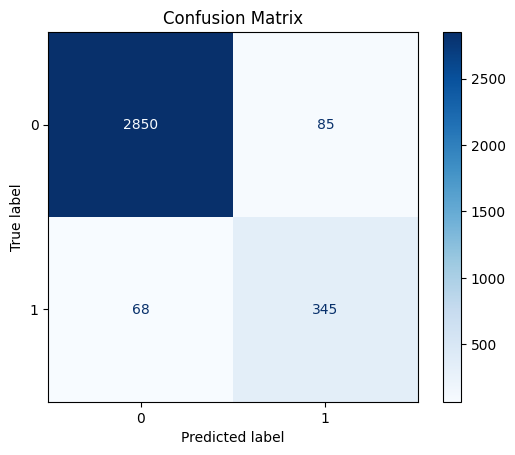

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, xg_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


XGBoost Model selected

In [ ]:
prec = precision_score(y_test, xg_pred)
rec = recall_score(y_test, xg_pred)
f1 = f1_score(y_test, xg_pred)

print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

Precision: 0.8023255813953488
Recall: 0.8353510895883777
F1 Score: 0.8185053380782918


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

acc = cross_val_score(xg, X_train_pca, y_train, cv=cv, scoring='accuracy')
f1  = cross_val_score(xg, X_train_pca, y_train, cv=cv, scoring='f1')
prec = cross_val_score(xg, X_train_pca, y_train, cv=cv, scoring='precision')
rec  = cross_val_score(xg, X_train_pca, y_train, cv=cv, scoring='recall')

print("Accuracy: {:.4f} ± {:.4f}".format(acc.mean(), acc.std()))
print("F1: {:.4f} ± {:.4f}".format(f1.mean(), f1.std()))
print("Precision: {:.4f} ± {:.4f}".format(prec.mean(), prec.std()))
print("Recall: {:.4f} ± {:.4f}".format(rec.mean(), rec.std()))

Accuracy: 0.9562 ± 0.0042
F1: 0.8240 ± 0.0167
Precision: 0.8174 ± 0.0176
Recall: 0.8307 ± 0.0177


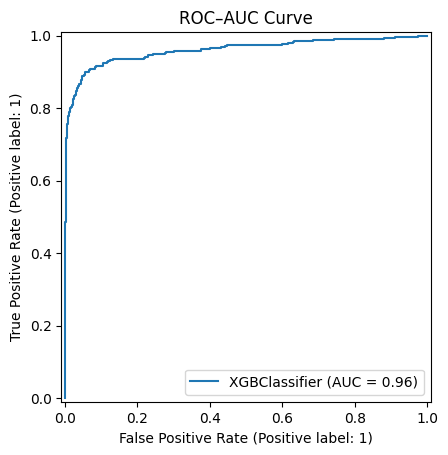

In [ ]:
from sklearn.metrics import RocCurveDisplay

#  ROC curve
RocCurveDisplay.from_estimator(xg, X_test_pca, y_test)
import matplotlib.pyplot as plt
plt.title("ROC–AUC Curve")
plt.show()

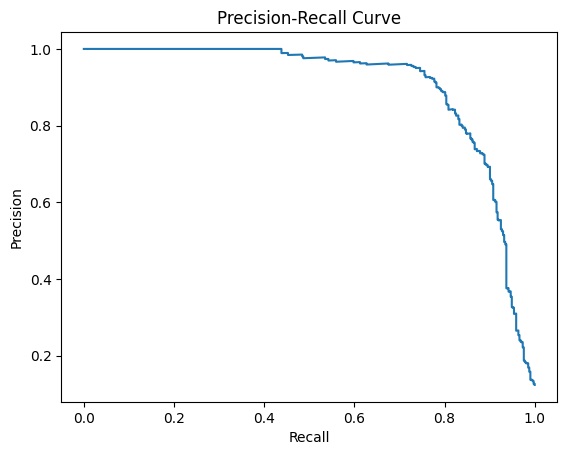

In [ ]:
from sklearn.metrics import precision_recall_curve

probs = xg.predict_proba(X_test_pca)[:, 1]
precision, recall, threshold = precision_recall_curve(y_test, probs)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

## Clustering

In [ ]:
# Import the datasets
import pandas as pd

h = pd.read_csv("Customer Loyalty History.csv")
a = pd.read_csv("Customer Flight Activity.csv")

In [ ]:
import pandas as pd

# Columns to aggregate
cols_to_agg = [
    'Flights Booked',
    'Flights with Companions',
    'Total Flights',
    'Distance',
    'Points Accumulated',
    'Points Redeemed',
    'Dollar Cost Points Redeemed'
]

# Aggregate everything by Loyalty Number using sum
a_agg = a.groupby('Loyalty Number')[cols_to_agg].sum().reset_index()

print(a_agg.head())
print("\nShape after aggregation:", a_agg.shape)


   Loyalty Number  Flights Booked  Flights with Companions  Total Flights  \
0          100018             157                       35            192   
1          100102             173                       42            215   
2          100140             152                       38            190   
3          100214              79                       17             96   
4          100272             127                       36            163   

   Distance  Points Accumulated  Points Redeemed  Dollar Cost Points Redeemed  
0     50682             5376.00             1513                          123  
1     40222             4115.25             1195                           96  
2     41252             4184.25              593                           48  
3     33982             3426.00              861                           70  
4     40872             4108.04             1007                           82  

Shape after aggregation: (16737, 8)


In [ ]:
a_agg.columns = a_agg.columns.str.strip()
h.columns = h.columns.str.strip()

# Create a dictionary such that Loyalty Number= 1 if Cancellation Year exists, else= 0
cancel_dict = h.set_index('Loyalty Number')['Cancellation Year'].notna().astype(int).to_dict()

# Map cancel column to a_agg using Loyalty Number
a_agg['cancel'] = a_agg['Loyalty Number'].map(cancel_dict).fillna(0).astype(int)

print(a_agg.head())
print(a_agg['cancel'].value_counts())


   Loyalty Number  Flights Booked  Flights with Companions  Total Flights  \
0          100018             157                       35            192   
1          100102             173                       42            215   
2          100140             152                       38            190   
3          100214              79                       17             96   
4          100272             127                       36            163   

   Distance  Points Accumulated  Points Redeemed  Dollar Cost Points Redeemed  \
0     50682             5376.00             1513                          123   
1     40222             4115.25             1195                           96   
2     41252             4184.25              593                           48   
3     33982             3426.00              861                           70   
4     40872             4108.04             1007                           82   

   cancel  
0       0  
1       0  
2       0  
3 

In [ ]:
# Remove label column
X = a_agg.drop(columns=['cancel'])

# Scale the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 3, silhouette score = 0.3585
n_clusters = 4, silhouette score = 0.3663
n_clusters = 5, silhouette score = 0.3655
n_clusters = 6, silhouette score = 0.3613


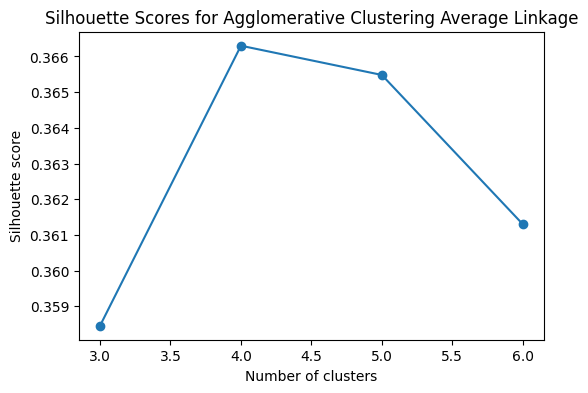

In [ ]:
# Agglomerative Average Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

cluster_range = range(3, 7)
sil_scores = []

# Calculate silhouette scores for each number of clusters
for n_clusters in cluster_range:
    agg = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    labels = agg.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)
    print(f"n_clusters = {n_clusters}, silhouette score = {score:.4f}")

# Plot silhouette scores
plt.figure(figsize=(6,4))
plt.plot(cluster_range, sil_scores, marker='o')
plt.title("Silhouette Scores for Agglomerative Clustering Average Linkage")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

In [ ]:
agg_avg = AgglomerativeClustering(
    n_clusters=4,
    linkage='average'
)

agg_labels = agg_avg.fit_predict(X_scaled)
a_agg['cluster_agg_avg'] = agg_labels
a_agg['cluster_agg_avg'].value_counts()

,count
cluster_agg_avg,
1,11501
3,4983
2,182
0,71


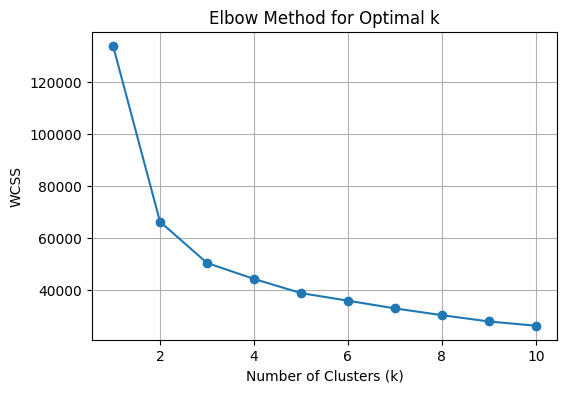

In [ ]:
# K-Means Clustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []  # Within-cluster sum of squares

# Try K = 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


In [ ]:
# Dunn Index function
def dunn_index(X, labels):
    distances = pairwise_distances(X)
    unique_labels = np.unique(labels)

    # Intra-cluster distance (max)
    intra = []
    for c in unique_labels:
        pts = np.where(labels == c)[0]
        if len(pts) > 1:
            intra.append(distances[np.ix_(pts, pts)].max())
    delta_intra = np.max(intra)

    # Inter-cluster distance (min)
    inter = []
    for i in unique_labels:
        for j in unique_labels:
            if i < j:
                pts_i = np.where(labels == i)[0]
                pts_j = np.where(labels == j)[0]
                inter.append(distances[np.ix_(pts_i, pts_j)].min())
    delta_inter = np.min(inter)

    return delta_inter / delta_intra

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import pairwise_distances
import numpy as np
import pandas as pd

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

a_agg['cluster_kmeans'] = kmeans_labels


sil = silhouette_score(X_scaled, kmeans_labels)

### Davies–Bouldin Index
db_index = davies_bouldin_score(X_scaled, kmeans_labels)


dunn = dunn_index(X_scaled, kmeans_labels)

print("\nCluster Counts:")
print(a_agg['cluster_kmeans'].value_counts())

print("\nEvaluation Metrics on 10% Stratified Sample:")
print(f"Silhouette Score: {sil}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Dunn Index: {dunn}")

# WCSS (full dataset)
print("\nWCSS:", kmeans.inertia_)



Cluster Counts:
cluster_kmeans
1    4595
3    4272
0    4255
2    3615
Name: count, dtype: int64

Evaluation Metrics on 10% Stratified Sample:
Silhouette Score: 0.29174087240651947
Davies-Bouldin Index: 1.2882949475589611
Dunn Index: 0.006375992107745761

WCSS: 44381.414901936725


In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.sparse.csgraph import minimum_spanning_tree
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
# MST Clustering
# Compute distance matrix
dist_matrix = squareform(pdist(X_scaled))

# Compute MST
mst = minimum_spanning_tree(dist_matrix).toarray()

# Extract non-zero MST edge distances
mst_distances = mst[mst != 0]

# Threshold percentile to control cluster size
percentile = 90  # 90 to get fewer/bigger clusters
threshold = np.percentile(mst_distances, percentile)
print(f"Threshold for cutting MST edges: {threshold:.4f}")

# Agglomerative clustering using MST connectivity
mst_connectivity = (mst > 0)

mst_clustering = AgglomerativeClustering(
    n_clusters=None,
    distance_threshold=threshold,
    connectivity=mst_connectivity
)

mst_labels = mst_clustering.fit_predict(X_scaled)

a_agg.loc[:, 'cluster_mst'] = mst_labels

unique, counts = np.unique(mst_labels, return_counts=True)

# Compute silhouette score
if len(unique) > 1:
    score = silhouette_score(X_scaled, mst_labels)
    print(f"Silhouette score: {score:.4f}")
else:
    print("Silhouette score cannot be calculated: less than 2 clusters")



Threshold for cutting MST edges: 0.4355
Silhouette score: 0.2308


n_clusters = 3, silhouette score = 0.2793
n_clusters = 4, silhouette score = 0.2059
n_clusters = 5, silhouette score = 0.2020
n_clusters = 6, silhouette score = 0.1952


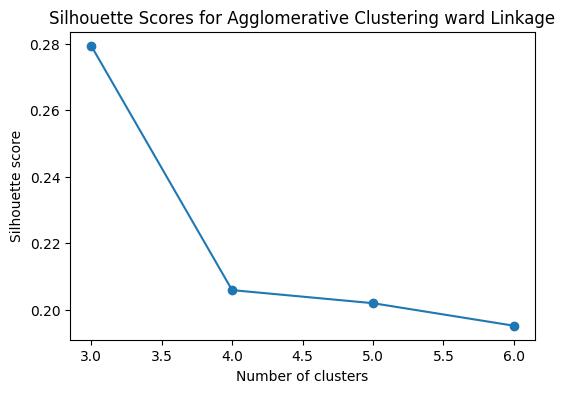

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Agglomerative Ward Clustering
cluster_range = range(3, 7)
sil_scores = []

# Calculate silhouette scores for each number of clusters
for n_clusters in cluster_range:
    agg = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = agg.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)
    print(f"n_clusters = {n_clusters}, silhouette score = {score:.4f}")

# Plot silhouette scores
plt.figure(figsize=(6,4))
plt.plot(cluster_range, sil_scores, marker='o')
plt.title("Silhouette Scores for Agglomerative Clustering ward Linkage")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()


In [ ]:
agg_ward = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)

agg_labels = agg_ward.fit_predict(X_scaled)
a_agg['cluster_agg_ward'] = agg_labels
a_agg['cluster_agg_ward'].value_counts()

,count
cluster_agg_ward,
0,9314
1,4142
2,3281


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

# GMM Clustering
features = a_agg.drop(columns=['Loyalty Number', 'cancel'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Fit GMM
n_clusters = 4
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

a_agg['cluster_gmm'] = gmm_labels

# Cluster counts
print("Cluster counts:")
print(a_agg['cluster_gmm'].value_counts())

# Silhouette score
sil_score = silhouette_score(X_scaled, gmm_labels)
print("\nSilhouette Score:", sil_score)

# Davies-Bouldin Index
db_score = davies_bouldin_score(X_scaled, gmm_labels)
print("Davies-Bouldin Index:", db_score)

wcss = 0
for i in range(n_clusters):
    cluster_points = X_scaled[gmm_labels == i]
    mean = gmm.means_[i]
    cov = gmm.covariances_[i]
    inv_cov = np.linalg.inv(cov)
    diffs = cluster_points - mean
    mdist_sq = np.sum(np.einsum('ij,jk,ik->i', diffs, inv_cov, diffs))
    wcss += mdist_sq

print("Approximate WCSS:", wcss)


Cluster counts:
cluster_gmm
3    5246
1    4414
2    3766
0    3311
Name: count, dtype: int64

Silhouette Score: 0.3206935233070387
Davies-Bouldin Index: 1.3035128854556728
Approximate WCSS: 177220.44903652585


In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import pdist
import pandas as pd


# List of cluster label columns
cluster_cols = [
    'cluster_kmeans',
    'cluster_mst',
    'cluster_gmm',
    'cluster_agg_ward',
    'cluster_agg_avg'
]

results = {}

for col in cluster_cols:
    labels = a_agg[col].values
    mask = labels != -1
    X_filtered = X_scaled[mask]
    labels_filtered = labels[mask]

    if len(np.unique(labels_filtered)) < 2:
        print(f"{col}: Cannot compute metrics (less than 2 clusters after filtering noise).")
        continue

    sil = silhouette_score(X_filtered, labels_filtered)
    dbi = davies_bouldin_score(X_filtered, labels_filtered)
    dunn = dunn_index(X_filtered, labels_filtered)

    wcss = 0
    for l in np.unique(labels_filtered):
        cluster_points = X_filtered[labels_filtered == l]
        centroid = cluster_points.mean(axis=0)
        wcss += np.sum((cluster_points - centroid)**2)

    results[col] = {
        'Silhouette Score': sil,
        'Davies-Bouldin Index': dbi,
        'Dunn Index': dunn,
        'WCSS': wcss
    }
results_df = pd.DataFrame(results).T
results_df


,Silhouette Score,Davies-Bouldin Index,Dunn Index,WCSS
cluster_kmeans,0.312396,1.279386,0.066938,87406.667817
cluster_mst,0.213818,1.160779,0.000096,2000.716600
cluster_gmm,0.320694,1.303513,0.014933,83503.157709
cluster_agg_ward,0.346361,1.227008,0.102585,101016.621328
cluster_agg_avg,0.361010,0.856504,0.109953,118382.112464


## Evaluation Inference:
The clustering models were evaluated using Silhouette Score, Davies–Bouldin Index, Dunn Index, and WCSS. Higher Silhouette and Dunn indicate better clustering quality, lower Davies–Bouldin indicates better separation, and WCSS reflects compactness but must be interpreted together with the other metrics:

The performance of each algorithm can be interpreted as follows:

*    **KMeans** showed moderate performance, with a Silhouette Score of 0.312 and Dunn Index of 0.0669, indicating average compactness and separation among clusters.
*   **MST** performed the worst. Its Silhouette Score dropped to 0.214 and Dunn Index to 0.000096, showing that clusters were neither meaningful nor compact, despite the very low WCSS.
*   **GMM** slightly improved over KMeans with a Silhouette Score of 0.321, but the higher Davies–Bouldin value (1.304) suggests weaker separation between clusters.
*   **Agglomerative Ward** achieved good results with a Silhouette Score of 0.346 and Dunn Index of 0.103, indicating well-formed and well-separated clusters, even though WCSS was high.
*   **Agglomerative Average** produced the best clustering. It achieved the highest Silhouette Score (0.361), the lowest Davies–Bouldin value (0.857), and the highest Dunn Index (0.110), clearly showing strong cohesion within clusters and strong separation between clusters.

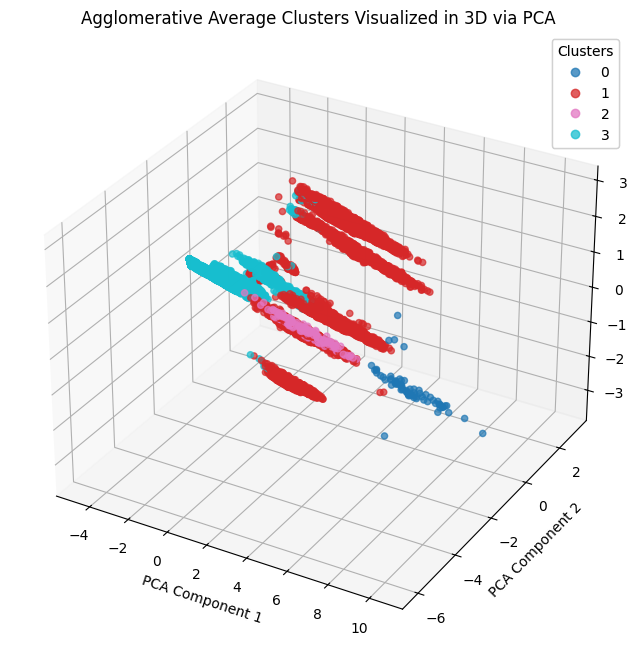

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Prepare features
features = a_agg.drop(columns=['Loyalty Number', 'cancel', 'cluster_agg_avg'])
X_scaled = StandardScaler().fit_transform(features)

pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca[:,0], X_pca[:,1], X_pca[:,2],
    c=a_agg['cluster_agg_avg'],
    cmap='tab10',
    s=20,
    alpha=0.7
)

# Labels and title
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('Agglomerative Average Clusters Visualized in 3D via PCA')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


In [ ]:
# Group by Agglomerative Average clusters
cluster_cancel_stats = a_agg.groupby('cluster_agg_avg')['cancel'].agg(
    total_customers='count',
    total_cancellations='sum'
).reset_index()

# Calculate cancellation rate per cluster
cluster_cancel_stats['cancellation_rate'] = cluster_cancel_stats['total_cancellations'] / cluster_cancel_stats['total_customers']

# Sort clusters by cancellation rate descending
cluster_cancel_stats = cluster_cancel_stats.sort_values(by='cancellation_rate', ascending=False)

print(cluster_cancel_stats)


   cluster_agg_avg  total_customers  total_cancellations  cancellation_rate
3                3             4983                 1792           0.359623
1                1            11501                  273           0.023737
2                2              182                    2           0.010989
0                0               71                    0           0.000000


In [ ]:
import pandas as pd

numeric_cols = [
    'Flights Booked',
    'Flights with Companions',
    'Total Flights',
    'Distance',
    'Points Accumulated',
    'Points Redeemed',
    'Dollar Cost Points Redeemed'
]

# Aggregate numeric features per cluster
agg_stats = a_agg.groupby('cluster_agg_avg')[numeric_cols].agg(['mean', 'median', 'min', 'max']).reset_index()

agg_stats.columns = ['_'.join(col).strip() if type(col) is tuple else col for col in agg_stats.columns.values]

# Calculate cancellation stats
cancel_stats = a_agg.groupby('cluster_agg_avg')['cancel'].agg(['mean', 'sum', 'count']).reset_index()
cancel_stats = cancel_stats.rename(columns={'mean': 'cancel_rate', 'sum': 'total_cancellations', 'count': 'total_customers'})

cluster_behavior_df = pd.merge(agg_stats, cancel_stats, left_on='cluster_agg_avg_', right_on='cluster_agg_avg', how='left')
cluster_behavior_df = cluster_behavior_df.drop(columns=['cluster_agg_avg_'])
cluster_behavior_df = cluster_behavior_df.round(2)


In [ ]:
import pandas as pd

# Display all columns
pd.set_option('display.max_columns', None)

# Print DataFrame
print(cluster_behavior_df)


   Flights Booked_mean  Flights Booked_median  Flights Booked_min  \
0               262.69                  264.0                 176   
1               128.11                  128.0                  27   
2               149.84                  150.5                  80   
3                30.06                   24.0                   0   

   Flights Booked_max  Flights with Companions_mean  \
0                 354                         67.94   
1                 235                         32.20   
2                 237                         47.50   
3                 128                          6.96   

   Flights with Companions_median  Flights with Companions_min  \
0                            68.0                           34   
1                            32.0                            1   
2                            48.0                           21   
3                             5.0                            0   

   Flights with Companions_max  Total Flights_m

### Agglomerative Average Clusters 0, 1, 2, 3:
1.  **Cluster 0 – Elite, High-Value Travellers**

* Very frequent travellers
* Long-distance flights
* Highly loyal, zero cancellations

  Average 262 flights booked, 78,722 km travelled, with 8,110 points accumulated and 1,935 points redeemed. Many flights are with companions (68 mean), making them the most valuable and reliable customers.


2.  **Cluster 2 – Value-Focused / Points Redeemers**

* Moderate travel

* High points redemption

* Very low cancellations

  Average 150 flights booked, distance 44,648 km, companion flights 47.5 mean. Points redeemed are highest (3,091), showing they actively maximize rewards while being reliable (cancel rate = 0.01).

3.  **Cluster 1 – Regular, Reliable Travellers**

*   Moderate travel frequency
*   Consistent loyalty
*   Low cancellations
  Average 128 flights booked, distance 37,636 km, companion flights 32 mean. Loyalty points are moderate (3,851 accumulated, 926 redeemed) and cancellation rate is very low (0.02), showing steady, dependable behaviour.

4. **Cluster 3 – Low-Engagement, High-Cancellation Travellers**

* Low travel frequency

* Weak loyalty

* Very high cancellations

  Average 30 flights booked, distance 8,786 km, companion flights 6.96 mean. Low loyalty points (898 accumulated, 220 redeemed) combined with 36% cancellations make this cluster high-risk and low-value.
